# MMD Problem Set 9
## Jakob Erben, Johannes Sindlinger, Raeesa  Yousaf (group 18)

## Exercise 1

n = 20 $\rightarrow$ We approximate until $(n-1) + (n-2) + ... \approx 100$ 

The pair $\{7,8\}$ is stored in $a[100]$.

Just to be sure: $k = (i-1)(n-\frac{i}{2}) + j - i$
$\Rightarrow 100 = (7-1)(20-\frac{7}{2}) + 8 - 7 \Leftrightarrow 100 = 99 + 8 - 7 \Leftrightarrow 100 = 100$

## Exercise 2a

The support values for each item are: 
s(1) = 4, s(2) = 6, s(3) = 8, s(4) = 8, s(5) = 6, s(6) = 4

The support values for each pair items are: 

s(1,2) = 2, s(1,3) = 3, s(1,4) = 2, s(1,5) = 1, s(1,6) = 0,

s(2,3) = 3, s(2,4) = 4, s(2,5) = 2, s(2,6) = 1,

s(3,4) = 4, s(3,5) = 4, s(3,6) = 2,

s(4,5) = 3, s(4,6) = 3,

s(5,6) = 2

## Exercise 2b
The following pairs hash to their respective buckets:

**0** = [], **1** = [(2,6), (3,4)], **2** = [(1,2), (4,6)], **3** = [(1,3)], **4** = [(1,4), (3,5)], **5** = [(1,5)], **6** = [(1,6), (2,3)], **7** = [(3,6)], **8** = [(2,4), (5,6)], **9** = [(4,5)], **10** = [(2,5)]

## Exercise 2c

Based on the support threshold, buckets 1, 2, 4 and 8 are the most frequent.

**0** = 0, **1** = 1 + 4 = 5, **2** = 2 + 3 = 5, **3** = 3, **4** = 2 + 4 = 6, **5** = 1, **6** = 0 + 3 = 3, **7** = 2, **8** = 4 + 2 = 6, **9** = 3, **10** = 2

## Exercise 2d

We only count the pairs which are associated with the frequent buckets. Namely: (2,6), (3,4), (1,2), (4,6), (1,4), (3,5), (2,4), (5,6)

## Exercise 3

We have determined buckets 1, 2, 4 and 8 are used for the second pass. The pairs (2,6), (3,4), (1,2), (4,6), (1,4), (3,5), (2,4), (5,6) are hashed onto the nine buckets:

**0** = [], **1** = [(4,6)], **2** = [(5,6)], **3** = [(1,2)], **4** = [], **5** = [(1,4)], **6** = [(2,4)], **7** = [(3,4)], **8** = [(2,6), (3,5)], 

The support threshold for each bucket is:
**0** = 0, **1** = 3, **2** = 2, **3** = 2, **4** = 0, **5** = 2, **6** = 4, **7** = 4, **8** = 1 + 4 = 5

Thus we reduce pairs (1,2) and (1,4) as they both hash to a buckets, whose count does not reach the support threshold.

## Exercise 4

This is quite a large calculation, refer to the code below

In [1]:
pairs = [ (1,2), (1,3), (1,4), (1,5), (1,6), (2,3), (2,4), (2,5), (2,6), (3,4), (3,5), (3,6), (4,5), (4,6), (5,6) ]
support_pairs = {(1,2):2, (1,3):3,  (1,4):2,  (1,5):1,  (1,6):0,  (2,3):3,  (2,4):4,  (2,5):2,
                 (2,6):1,  (3,4):4,  (3,5):4,  (3,6):2,  (4,5):3,  (4,6):3,  (5,6):2}

thresholdNotFound = True
candidateTH = 1
while thresholdNotFound:
    buckets = {}
    pairs_copy = pairs.copy()

    for i in range(0,5):
        buckets[i]=[]

    #first hash
    for pair in pairs_copy:
        hashIndex = (2 * pair[0] + 3 * pair[1] + 4) % 5
        buckets[hashIndex].append(pair)

    for i in range(0,5):
        support_bucket = 0
        for pair in buckets[i]:
            support_bucket = support_bucket +support_pairs[pair]

        if support_bucket < candidateTH:
            for pair in buckets[i]:
                pairs_copy.remove(pair)
        buckets[i]=[]

    ###repeat for second hash
    #first hash
    for pair in pairs_copy:
        hashIndex = (pair[0] + 4 * pair[1]) % 5
        buckets[hashIndex].append(pair)

    for i in range(0,5):
        support_bucket = 0
        for pair in buckets[i]:
            support_bucket = support_bucket + support_pairs[pair]

        if support_bucket < candidateTH:
            for pair in buckets[i]:
                pairs_copy.remove(pair)


    if len(pairs_copy) <= 8:
        thresholdNotFound = False
        pairs = pairs_copy
    else:
        print('Afterwards the following pairs are left over: ' + str(pairs_copy))
        print('Tested the candidate threshold of: '+str(candidateTH))
        candidateTH +=1
print('The correct support threshold is :'+str(candidateTH))
print('Afterwards the following pairs are left over: '+str(pairs))

Afterwards the following pairs are left over: [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]
Tested the candidate threshold of: 1
Afterwards the following pairs are left over: [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]
Tested the candidate threshold of: 2
Afterwards the following pairs are left over: [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]
Tested the candidate threshold of: 3
Afterwards the following pairs are left over: [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]
Tested the candidate threshold of: 4
Afterwards the following pairs are left over: [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]
Tested the candidate threshold of: 5
Afterwards the following pairs are left over: [(1, 2), (1, 3), (1, 4

## Exercise 5a

P(c1 and c2 match) = P(c1 and c2 have the same answers to any questionair) = 1 - P(c1 and c2 have no matching questionair) 1 - P(c1 and c2 have no matching for q_i)^b

to complete this we need to know that the porbability that c1 and c2 do not match for some given questionair: P(c1 and c2 have no matching for q_i) = 1-(p^r)

Hence, we can complete the formula to P(c1 and c2 match) = $1 - (1 - p^r)^b$

## Exercise 5b

P(c1 and c2 match in 2 questionairs) = 1- P(c1 and c2 do not match) -P(c1 and c2 match only exactly one)

We can follow P(c1 and c2 do not match) = $ 1 - (1 - p^r)^b$ from a)

P(c1 and c2 match only exactly one) = P(no match for q_i)^b-1 * P(match for q_i) = $(1 - p^r)^{b-1}p^r$

now we can combine to receive:

P(c1 and c2 match in 2 questionairs) = $ 1 - (1 - p^r)^b - (1 - p^r)^{b-1}p^r$

## Exercise 6a

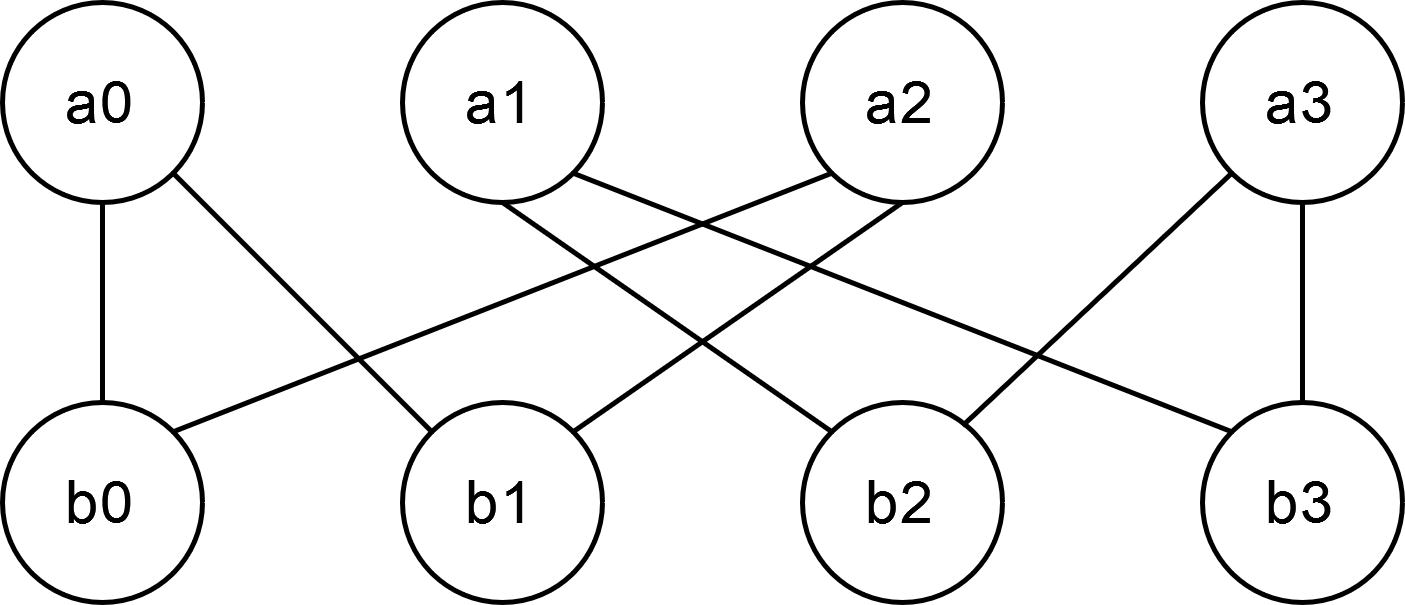

The list of all perfect matches are:

1. $ (a_0,b_0), (a_1,b_2), (a_2,b_1), (a_3,b_3) $
2. $ (a_0,b_1), (a_1,b_2), (a_2,b_0), (a_3,b_3) $
3. $ (a_0,b_0), (a_1,b_3), (a_2,b_1), (a_3,b_2) $
4. $ (a_0,b_1), (a_1,b_3), (a_2,b_0), (a_3,b_2) $

## Exercise 6b

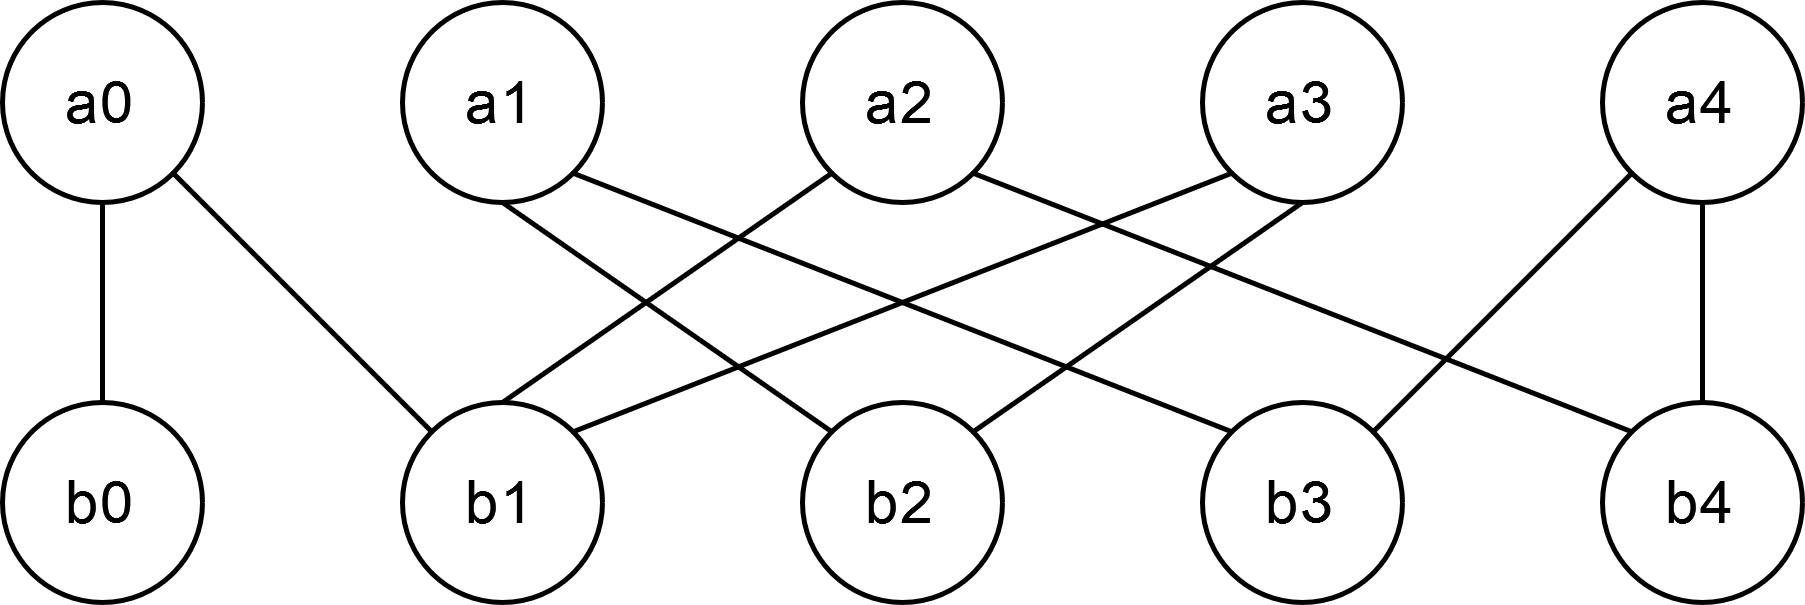

The list of all perfect matches are:

1. $ (a_0,b_0), (a_1,b_3), (a_2,b_1), (a_3,b_2), (a_4,b_4) $
2. $ (a_0,b_0), (a_1,b_2), (a_2,b_4), (a_3,b_1), (a_4,b_3) $

## Exercise 7

1. xyyy $\rightarrow$ never optimal since the ideal would be AAAA or BAAA but A only has a budget of 2
2. yyxx $\rightarrow$ optimal if AABB but the algorithm will yield ABAB or ABBA, so never optimal
3. xyyx $\rightarrow$ optimal if BAAB which can be achieved, but other possible results are ABAB, BABA, ABBA, 
4. xzyz $\rightarrow$ optimal if ABAB which can be achieved and is the only option, always optimal

## Exercise 8a

The advertisers are picked in the following order:

A1 - A2 - A3 - A2 - A4 - A1 - A3 - A4 - A3 - A1 - A4

Since this solves the problem optimally and is deterministic we know that the competitive ratio is 1.

## Exercise 8b

We can arrange the queries as follows: Q1 - Q1 - Q1 - Q1 (this sets A1 and A4 to a budget of 1) Q4 - Q4 - Q2 - Q2 (this sets A2 and A3 to a budget of 1) Q3 - Q3 (this sets A2 and A3 to 0) Q3 (this query is then the one which can not be assigned)